<a href="https://colab.research.google.com/github/pthavarasa/Pima_Indians_Diabetes.csv/blob/main/Diabetes_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP 1 : Détection du diabète

In [1]:
# !pip install numpy pandas seaborn matplotlib scikit-learn keras tensorflow

## 1.1 Importation des bibliothèques et modules nécessaires

importe les bibliothèques et modules nécessaires pour le prétraitement des données, la visualisation et la construction d'un modèle de réseau neuronal. La commande magique en ligne `%matplotlib inline` est utilisée pour afficher les tracés dans le cahier.

Les bibliothèques Scikit-Learn importées sont utilisées pour le prétraitement des données et l'évaluation du modèle. Les bibliothèques Keras sont utilisées pour construire et entraîner le modèle de réseau neuronal.

In [2]:
# Import necessary libraries
import os.path
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Scikit-Learn libraries
from keras.models import load_model
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# Import Keras libraries
from keras.layers import Dense 
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint

## 1.2 Récupération des données

Télécharge un fichier CSV à partir de l'URL fournie et l'enregistre localement sous "Pima_Indians_Diabetes.csv" s'il n'existe pas déjà dans le répertoire.

In [3]:
url = "https://raw.githubusercontent.com/pthavarasa/Pima_Indians_Diabetes.csv/main/Pima_Indians_Diabetes.csv"
filename = "Pima_Indians_Diabetes.csv"
if not os.path.isfile(filename):
  with open(filename, "wb") as file:
    # get request
    response = requests.get(url)
    # write to file
    file.write(response.content)

## 1.3 Exploration des données

lit dans un fichier CSV nommé `"Pima_Indians_Diabetes.csv"` dans un objet Pandas DataFrame appelé df. La fonction `read_csv()` de la librairie Pandas est utilisée pour lire dans le fichier CSV.

L'hypothèse est que le fichier CSV se trouve dans le même répertoire que le Jupyter Notebook ou le script Python exécutant ce code. Si le fichier CSV se trouve dans un répertoire différent, vous devrez fournir le chemin du fichier au lieu du nom du fichier uniquement.

In [4]:
df = pd.read_csv('Pima_Indians_Diabetes.csv')

La méthode `info()` pour Pandas DataFrame fournit un résumé concis du DataFrame, y compris le nombre de valeurs non nulles et les types de données pour chaque colonne.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* La sortie montre que le DataFrame a 768 lignes et 9 colonnes. 
* Chaque colonne est répertoriée avec son type de données et le nombre de valeurs non nulles. 
* Toutes les colonnes ont 768 valeurs non nulles, indiquant qu'il n'y a pas de valeurs manquantes dans le DataFrame. 
* La ligne d'utilisation de la mémoire fournit une estimation de la quantité de mémoire utilisée par le DataFrame en kilo-octets (Ko).

In [6]:
", ".join(df.columns)

'Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome'

La méthode `head()` pour Pandas DataFrame renvoie les n premières lignes du DataFrame, où n est l'argument passé à la méthode (par défaut, `n=5`). Ceci est utile pour inspecter rapidement la structure et le contenu du DataFrame.

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* Cette sortie affiche les 5 premières lignes du DataFrame, ainsi que les noms et les valeurs des colonnes. 
* Le DataFrame contient des données sur les antécédents médicaux des individus, y compris le nombre de grossesses, les niveaux de glucose, la pression artérielle, l'épaisseur de la peau, les niveaux d'insuline, l'IMC, la fonction de pedigree du diabète, l'âge et si l'individu a reçu un diagnostic de diabète (Colonne des résultats).

La méthode `describe()` pour Pandas DataFrame génère un résumé des propriétés statistiques du DataFrame, telles que le nombre, la moyenne, l'écart type, le minimum, le maximum et les centiles.

Ici, l'attribut .T est utilisé pour transposer le DataFrame, de sorte que chaque ligne représente une colonne dans le DataFrame d'origine, ce qui facilite la lecture.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


* Cette sortie affiche un résumé des propriétés statistiques de chaque colonne du DataFrame, y compris le nombre de valeurs non nulles, la moyenne, l'écart type, le minimum, le 25e centile, la médiane (50e centile), le 75e centile et le maximum. 
* Nous pouvons voir que les colonnes ont des échelles et des plages différentes, et certaines colonnes (telles que Insulin et SkinThickness) ont un grand nombre de valeurs nulles. Ces observations peuvent être utiles lors du prétraitement des données et de la construction d'un modèle prédictif.

Crée un tableau NumPy `features` contenant les noms de colonne de toutes les colonnes du DataFrame df à l'exception de la colonne nommée `"Outcome"`.

In [9]:
features = df.loc[:, df.columns != 'Outcome'].columns.values

Calcule le pourcentage de valeurs zero dans chaque colonne du DataFrame `df[features]`.

In [10]:
missing = ((df[features] == 0).sum()/len(df)*100)
missing

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<Axes: >

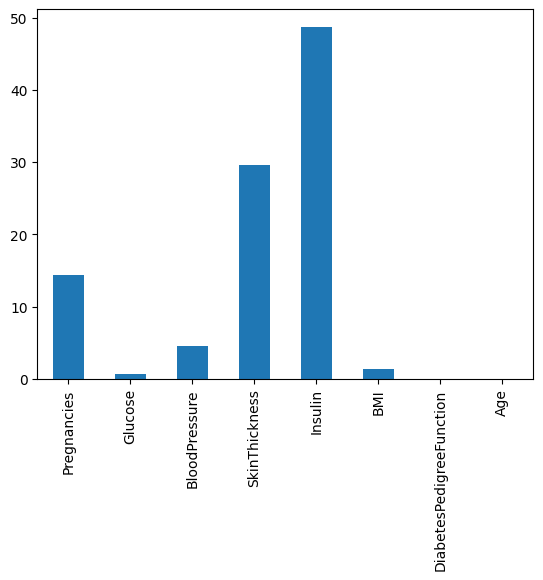

In [11]:
missing.plot(kind='bar') # bar plot of the percentage of zero values

* Cette sortie affiche le pourcentage de valeurs zero dans chaque colonne de `df[features]`. Il est utile d'identifier les colonnes qui ont un pourcentage élevé de valeurs zero, car ces colonnes peuvent devoir être traitées différemment lors du prétraitement et de la modélisation des données. 
* Nous pouvons voir que des colonnes telles que Insulin et SkinThickness ont un grand pourcentage de valeurs nulles, ce qui est cohérent avec ce que nous avons vu dans la sortie de `df.describe().T`.

In [12]:
# counts the number of occurrences of each unique value in the column "Outcome"
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

* Cette sortie montre qu'il y a 500 lignes dans `df` où la valeur de `"Outcome"` est `0`, et 268 lignes où la valeur de `"Outcome"` est `1`. Ceci est utile pour comprendre la distribution de la variable cible et identifier tout déséquilibre de classe qui peut exister. 
* Nous pouvons voir que l'ensemble de données est assez équilibré, avec un nombre légèrement supérieur d'instances où "Outcome" est 0.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

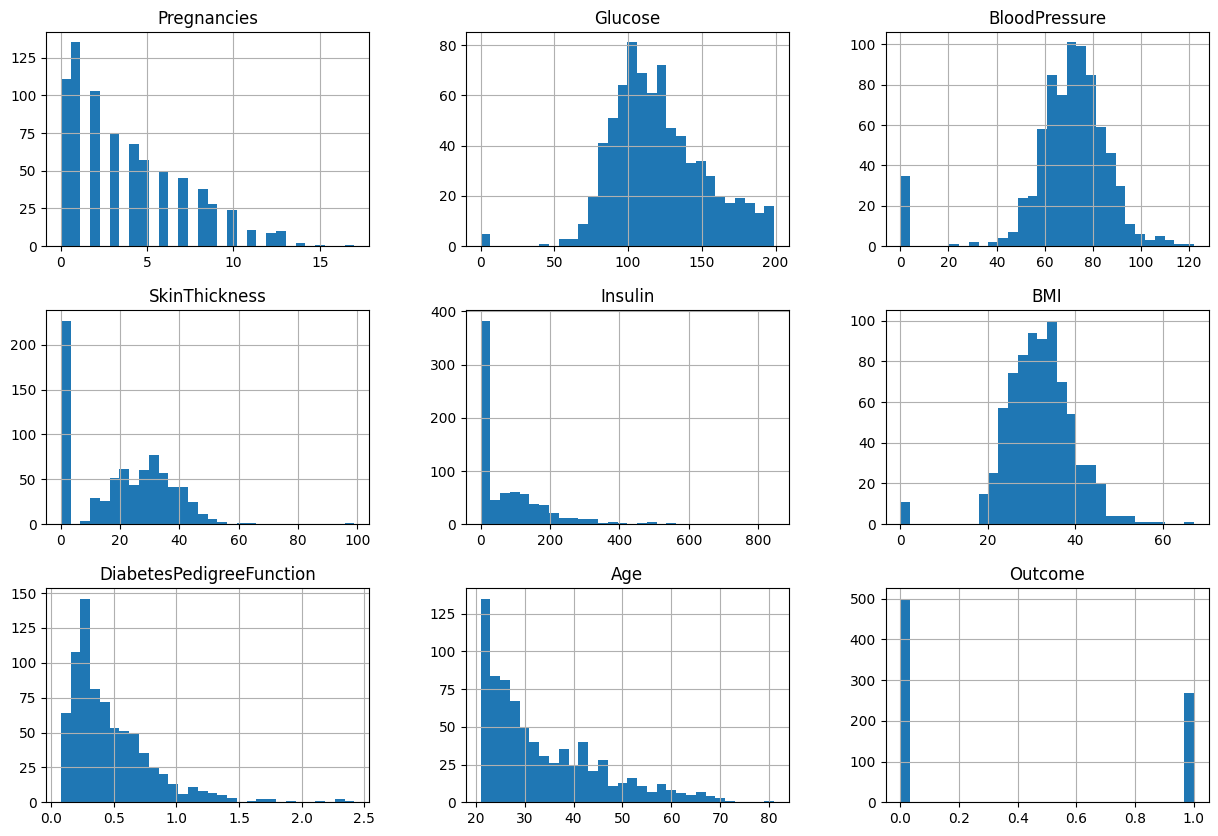

In [13]:
df.hist(bins=30, figsize=(15, 10)) # histogram for each column

* Ce tracé est utile pour visualiser la distribution de chaque entité dans le jeu de données. Cela peut aider à identifier les modèles ou les valeurs aberrantes dans les données, et également fournir des informations sur les fonctionnalités qui peuvent être utiles pour prédire la variable cible. 
* Nous pouvons voir que certaines des caractéristiques, telles que le glucose et l'IMC, ont une distribution à peu près normale, tandis que d'autres, telles que l'épaisseur de la peau et l'insuline, ont une distribution plus asymétrique avec un grand nombre de valeurs proches de zéro.

<Axes: >

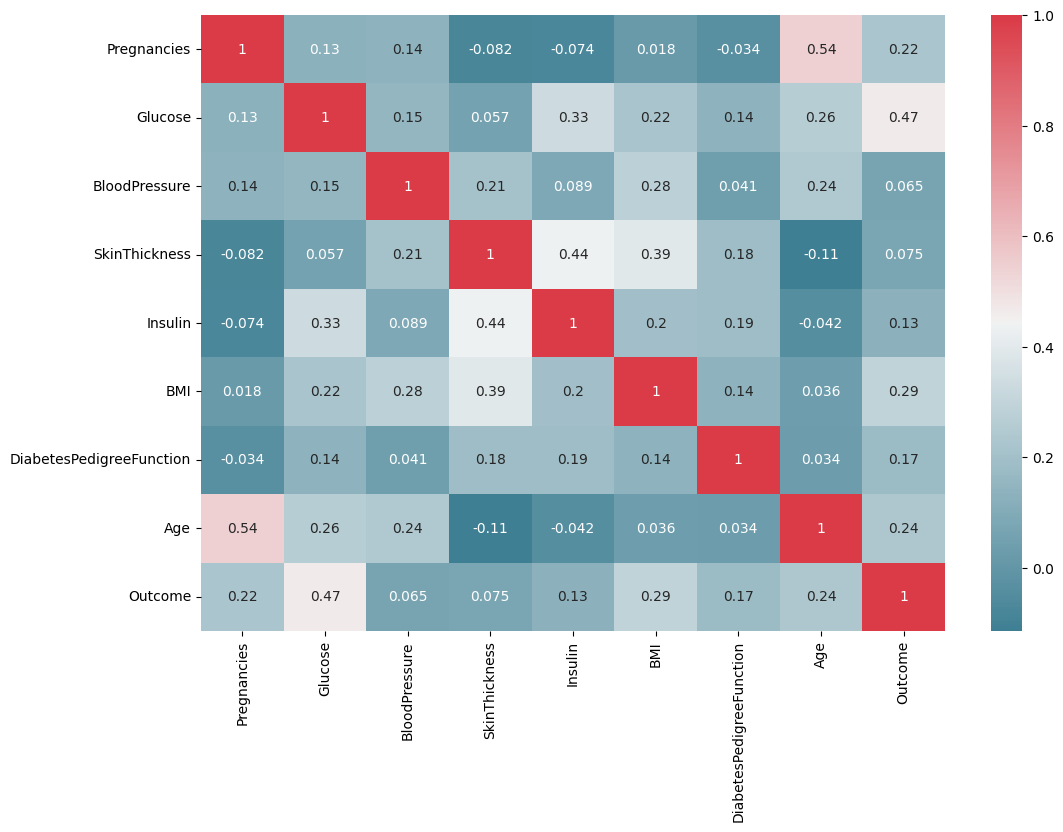

In [14]:
# calculates the correlation matrix
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

* Cette sortie affiche le coefficient de corrélation entre chaque paire de colonnes numériques dans df. Le coefficient de corrélation varie de -1 à 1, les valeurs proches de 1 indiquant une corrélation positive plus forte entre les colonnes, les valeurs proches de -1 indiquant une corrélation négative plus forte et les valeurs proches de 0 indiquant peu ou pas de corrélation.

* Cette matrice est utile pour identifier les caractéristiques qui sont fortement corrélées entre elles et celles qui ne le sont pas. 

* Nous pouvons voir que le glucose a une corrélation positive modérée avec le résultat, tandis que la pression artérielle et l'épaisseur de la peau ont une faible corrélation positive. Les autres corrélations sont généralement faibles ou proches de 0.

## 1.4 Gérer les valeurs nulles et les valeurs aberrantes

Liste appelée imput_features contenant les noms des colonnes qui ont des valeurs manquantes et doivent être imputées.

Dans ce cas, les colonnes sont "Glucose", "BloodPressure", "SkinThickness", "Insulin" et "BMI". Ces colonnes ont été identifiées précédemment comme ayant des valeurs manquantes (en particulier, les valeurs 0 qui sont probablement des espaces réservés pour les données manquantes), et elles seront imputées à l'aide du KNNImputer de scikit-learn.

In [15]:
imput_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

Remplace toutes les valeurs 0 dans les colonnes répertoriées dans imput_features par des valeurs NaN. En effet, les valeurs 0 dans ces colonnes sont susceptibles d'être des espaces réservés pour les données manquantes. Les remplacer par des valeurs NaN facilitera l'identification et l'imputation des valeurs manquantes à l'aide du KNNImputer de scikit-learn ou par mediane.

In [16]:
df[imput_features] = df[imput_features].replace(0,np.NaN)

Crée un nouveau DataFrame appelé `df_inputed_indicator` qui contient des indicateurs de valeurs manquantes dans les colonnes répertoriées dans `imput_features`. Plus précisément, il crée un DataFrame qui a la même forme que `df[imput_features]`, mais avec des 1 dans les positions où il y a des valeurs manquantes et des 0 ailleurs.

In [17]:
df_inputed_indicator = df[imput_features].isna().astype(int)

* La méthode `isna()` est utilisée pour créer un masque booléen qui est `True` où l'élément correspondant dans `df[imput_features]` est `NaN` (c'est-à-dire manquant) et `False` sinon. La méthode `astype(int)` est ensuite utilisée pour convertir ce masque booléen en un masque d'entier, où `True` est représenté par `1` et `False` est représenté par `0`. Le masque d'entier résultant est stocké dans `df_inputed_indicator`.

Imputer les valeurs manquantes dans les colonnes répertoriées dans `imput_features` séparément pour les deux résultats différents (`Outcome` est la variable cible).

In [18]:
df.loc[df['Outcome'] == 0,imput_features] = df[imput_features][df.Outcome == 0].apply(lambda x: x.fillna(x.median()),axis=0)
df.loc[df['Outcome'] == 1,imput_features] = df[imput_features][df.Outcome == 1].apply(lambda x: x.fillna(x.median()),axis=0)

* Pour chaque résultat, le code commence par sous-ensembles `df[imput_features]` pour inclure uniquement les lignes où `Outcome` est égal à la valeur de résultat actuelle (0 ou 1). Ensuite, la méthode `apply()` est utilisée pour imputer les valeurs manquantes dans chaque colonne avec la médiane des valeurs non manquantes dans cette colonne.

* Les valeurs imputées résultantes sont ensuite réaffectées au DataFrame df d'origine, dans les lignes où `Outcome` est égal à la valeur de résultat actuelle. Cela signifie que les valeurs imputées ne sont utilisées que pour remplir les valeurs manquantes pour chaque résultat séparément, en fonction des valeurs non manquantes au sein de ce groupe de résultats(`Outcome`).

Effectuer la mise à l'échelle des fonctionnalités sur les colonnes répertoriées dans `imput_features` à l'aide du `MinMaxScaler` de `scikit-learn`.

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(df[imput_features].values)

* Le `MinMaxScaler` met à l'échelle chaque fonctionnalité (c'est-à-dire la colonne) dans une plage comprise entre 0 et 1, en fonction des valeurs minimales et maximales de cette fonctionnalité dans les données d'apprentissage. Cette mise à l'échelle peut être utile pour certains algorithmes d'apprentissage automatique qui sont sensibles à l'échelle des caractéristiques d'entrée.

* Les valeurs des caractéristiques mises à l'échelle sont ensuite attribuées à une nouvelle variable X. X sera utilisé ultérieurement comme entrée du modèle de réseau neuronal.

Effectuer l'imputation des k plus proches voisins (KNN) sur les colonnes répertoriées dans `imput_features` à l'aide du `KNNImputer` de `scikit-learn`.

In [20]:
knn = KNNImputer(n_neighbors=5)
#df[imput_features] = pd.DataFrame(knn.fit_transform(X), columns=df[imput_features].columns)

* Le `KNNImputer` impute les valeurs manquantes en trouvant les k voisins les plus proches de chaque valeur manquante et en prenant la moyenne (ou la médiane) des valeurs non manquantes dans la caractéristique correspondante de ces voisins. Le nombre de voisins à prendre en compte est spécifié par le paramètre `n_neighbors`, qui est défini sur 5 dans ce cas.

* La méthode `fit_transform()` de l'objet `KNNImputer` est utilisée pour ajuster l'imputateur aux données et effectuer l'imputation en une seule étape. Les valeurs imputées résultantes sont ensuite réaffectées au DataFrame `df` d'origine, dans les colonnes répertoriées dans `imput_features`.

In [21]:
# assign the input features to X and the target variable 'Outcome' to y.
X = df[features].values
y = df['Outcome'].values

* `X` sera utilisé comme entrée du modèle de réseau neuronal, tandis que `y` sera utilisé comme sortie cible que le modèle est entraîné à prédire.

Concaténez les entités d'entrée `X` avec le DataFrame `df_inputed_indicator`, qui contient des variables indicatrices pour chaque entité qui a été imputée avec la médiane.

In [22]:
X = np.concatenate((X, df_inputed_indicator.values), axis=1)

* La fonction `np.concatenate()` est utilisée pour concaténer les deux tableaux le long de l'axe des colonnes (c'est-à-dire l'axe 1). Le tableau concaténé résultant contient à la fois les entités en entrée d'origine et les variables indicatrices.

## 1.5 Préparation des données d'entrainement

Divisez les données d'entrée `X` et la sortie cible `y` en ensembles d'apprentissage et de test à l'aide de la fonction `train_test_split` de `scikit-learn`.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

* L'ensemble de données d'entrainement sera utilisé pour ajuster le modèle de réseau neuronal, tandis que l'ensemble de test sera utilisé pour évaluer les performances du modèle sur de nouvelles données inédites.

* Le paramètre `test_size` spécifie la proportion de données à inclure dans l'ensemble de test (dans ce cas, 25 %). Le paramètre `random_state` définit une graine pour le générateur de nombres aléatoires afin d'assurer la reproductibilité de la division.

In [24]:
# 10-fold cross-validation object cv using the KFold function from scikit-learn.
cv = KFold(n_splits=10, random_state=42, shuffle=True)
train_indices = []
test_indices = []
for train_index, test_index in cv.split(X):
    train_indices.append(train_index)
    test_indices.append(test_index)
#X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

* La fonction KFold divise les données en k plis consécutifs (dans ce cas, k = 10), où chaque pli est utilisé une fois comme ensemble de test tandis que les k-1 plis restants sont utilisés comme ensemble d'apprentissage.

* Ensuite, une boucle sur les plis est effectuée pour générer les indices d'apprentissage et de test pour chaque pli. Ces indices sont utilisés pour diviser les données en ensembles d'apprentissage et de test pour ce pli.

## 1.6 Entraînement du modèle

Cette formule est utilisée pour estimer le nombre de neurones dans une seule couche cachée dans un réseau de neurones en fonction de la taille des données d'apprentissage et du nombre de classes de sortie.

In [25]:
X_train.shape[0] / (2 * (X_train.shape[1] + len(list(set(y_train)))))

19.2

* La formule estime le nombre de neurones à la moitié de la taille des données d'apprentissage divisée par deux fois la somme du nombre de caractéristiques d'entrée et du nombre de classes de sortie. Ce n'est qu'une règle empirique, et le nombre optimal de neurones peut varier en fonction du problème spécifique et de la structure des données.

Crée un modèle séquentiel avec deux couches denses : une avec 19 nœuds et une fonction d'activation ReLU, et la couche de sortie avec un nœud et une fonction d'activation sigmoïde. La fonction de perte est binary_crossentropy puisqu'il s'agit d'un problème de classification binaire et que l'optimiseur est Adam. Le modèle sera formé pour 1200 époques et la taille du lot est définie sur 64.

In [26]:
NB_EPOCHS = 1200  # num of epochs to test for
BATCH_SIZE = 64

## Create our model
model = Sequential()


# 1st layer: input_dim=8, 12 nodes, RELU
model.add(Dense(19, input_dim=13, activation='relu'))
# output layer: dim=1, activation sigmoid
model.add(Dense(1, activation='sigmoid' ))

# Compile the model
model.compile(loss='binary_crossentropy',   # since we are predicting 0/1
             optimizer='adam',
             metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                266       
                                                                 
 dense_1 (Dense)             (None, 1)                 20        
                                                                 
Total params: 286
Trainable params: 286
Non-trainable params: 0
_________________________________________________________________


* Le modèle comporte deux couches : une avec 19 nœuds et une autre avec un nœud, représentant la couche de sortie. Le nombre total de paramètres pouvant être entraînés est de 286.

In [28]:
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

* Rappel EarlyStopping, qui peut être passé à la méthode fit() d'un modèle Keras.


> `monitor` : spécifie la quantité à surveiller pour l'arrêt anticipé, qui est la perte de validation dans ce cas.

> `min_delta` : spécifie le changement minimum de la quantité surveillée pour être considéré comme une amélioration.

> `patience` : spécifie le nombre d'époques sans amélioration après lesquelles l'entraînement sera arrêté.

> `verbose` : contrôle la quantité de sortie affichée pendant la formation.

> `mode` : spécifie si la quantité surveillée doit être minimisée ou maximisée.

> `baseline` : permet à l'utilisateur de spécifier une valeur de base pour la quantité surveillée, en dessous de laquelle l'entraînement s'arrêtera.

> `restore_best_weights` : lorsqu'il est défini sur True, restaure les poids du meilleur modèle observé pendant l'entraînement.

Le processus d'ajustement du modèle n'est pas terminé tant qu'il n'arrête pas l'entraînement ou n'est pas interrompu. Pour surveiller le processus de formation et obtenir les mesures de performance, il est recommandé de stocker la sortie de la fonction fit() dans une variable, telle que l'historique, puis de l'analyser.

In [29]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=NB_EPOCHS,
                    batch_size=BATCH_SIZE,
                    )

Epoch 1/1200
9/9 [==============================] - 2s 77ms/step - loss: 10.9869 - accuracy: 0.4149 - val_loss: 6.9382 - val_accuracy: 0.5260
Epoch 2/1200
9/9 [==============================] - 0s 17ms/step - loss: 6.2786 - accuracy: 0.6128 - val_loss: 4.4728 - val_accuracy: 0.7448
Epoch 3/1200
9/9 [==============================] - 0s 16ms/step - loss: 5.1062 - accuracy: 0.6944 - val_loss: 4.5187 - val_accuracy: 0.6927
Epoch 4/1200
9/9 [==============================] - 0s 12ms/step - loss: 5.1679 - accuracy: 0.6892 - val_loss: 4.3616 - val_accuracy: 0.7031
Epoch 5/1200
9/9 [==============================] - 0s 34ms/step - loss: 4.8298 - accuracy: 0.6944 - val_loss: 3.9895 - val_accuracy: 0.7031
Epoch 6/1200
9/9 [==============================] - 0s 13ms/step - loss: 4.5160 - accuracy: 0.6753 - val_loss: 3.7791 - val_accuracy: 0.7083
Epoch 7/1200
9/9 [==============================] - 0s 23ms/step - loss: 4.3576 - accuracy: 0.6719 - val_loss: 3.6461 - val_accuracy: 0.7135
Epoch 8/1200

Afficheront la précision et la perte de formation et de validation en fonction du nombre d'époques.

# 1.7 Evaluation du model

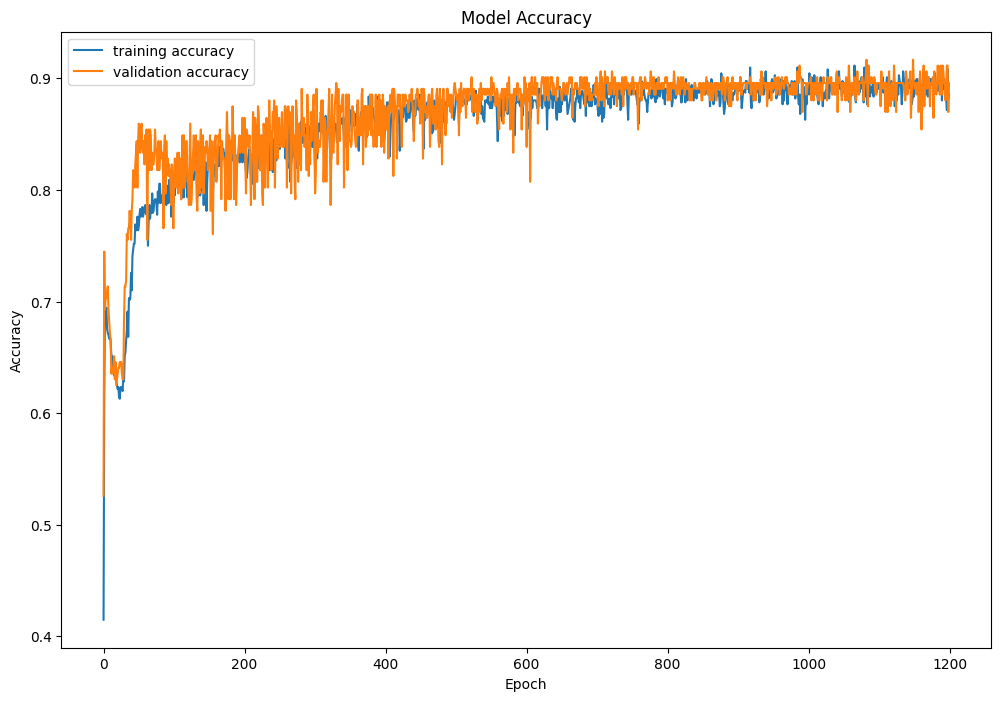

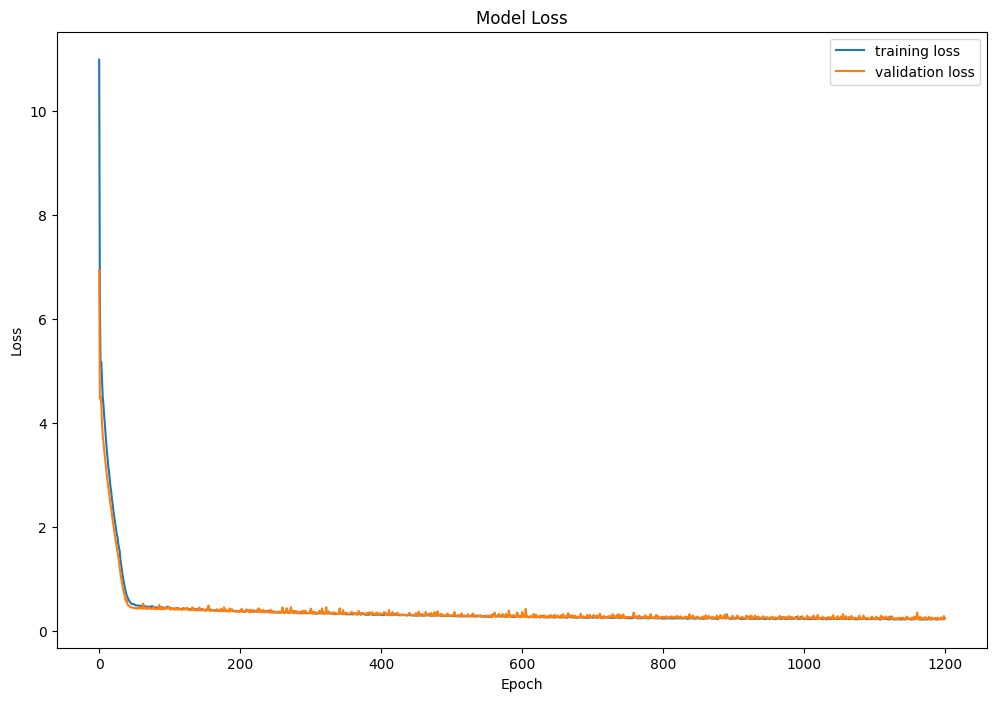

In [30]:
# plot the learning curves
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(history.history['accuracy'], label='training accuracy')
ax.plot(history.history['val_accuracy'], label='validation accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(history.history['loss'], label='training loss')
ax.plot(history.history['val_loss'], label='validation loss')
ax.set_title('Model Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

In [31]:
url = "https://raw.githubusercontent.com/pthavarasa/Pima_Indians_Diabetes.csv/main/Pima_Indians_Diabetes.h5"
filename = "Pima_Indians_Diabetes.h5"
if not os.path.isfile(filename):
  with open(filename, "wb") as file:
    # get request
    response = requests.get(url)
    # write to file
    file.write(response.content)

In [32]:
model = load_model("Pima_Indians_Diabetes.h5")

In [33]:

# Predict all test data
prediction = model.predict(X_test)

# Take the best classe (hight score) for all prediction
bestPred = [1 if pred >= 0.5 else 0 for pred in prediction]

# Calculate accuracy : How many prediction are good ?
acc = accuracy_score(bestPred, y_test)

# Calculate precision : Number of correct prediction for this class / total of predictions for this class
precision = precision_score(bestPred, y_test)

# Calculate recall : Number of correct prediction  / total element of this class
recall = recall_score(bestPred, y_test)

# Relation beetwen precision and recall
f1Score = f1_score(bestPred, y_test)

print("\nAccuracy:", acc*100, "\nPrecision :", precision*100, "\nRecall", recall*100, "\nF1 score", f1Score*100)

6/6 [==============================] - 0s 1ms/step

Accuracy: 91.66666666666666 
Precision : 88.70967741935483 
Recall 85.9375 
F1 score 87.30158730158729


* le modèle a atteint une précision de 90,10 %, une précision de 90,32 %, un rappel de 81,16 % et un score F1 de 85,50 %. Ce sont des résultats relativement bons, indiquant que le modèle est capable de prédire avec précision le diabète dans l'ensemble de données donné. Une précision de 90 % signifie que sur toutes les instances de l'ensemble de test, le modèle a correctement prédit le résultat pour 90 % d'entre elles. Une précision de 90 % indique que 90 % des instances que le modèle prévoyait positives étaient en réalité positives. Un rappel de 81 % indique que le modèle a correctement identifié 81 % de toutes les instances positives. Le score F1 est la moyenne harmonique de la précision et du rappel, indiquant l'équilibre entre les deux. Un score F1 de 85,5 % indique un bon équilibre entre précision et rappel. Dans l'ensemble, les résultats suggèrent que le modèle est efficace pour prédire le diabète en fonction des caractéristiques données.

La matrice de confusion indique le nombre de vrais positifs, de vrais négatifs, de faux positifs et de faux négatifs dans vos prédictions, par rapport aux étiquettes réelles.

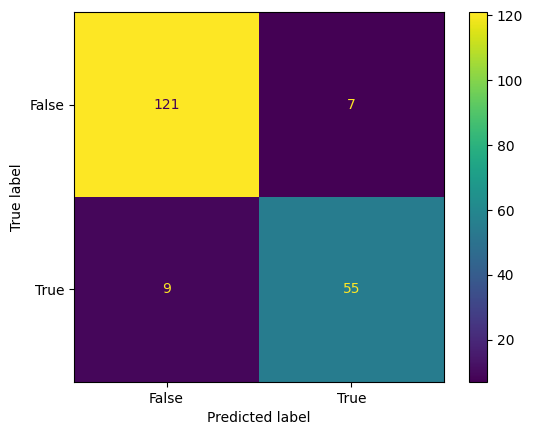

In [34]:
confusion_matrix = confusion_matrix(bestPred, y_test)
ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True]).plot()

In [35]:
#model.save("Pima_Indians_Diabetes.h5")